polyhedron(faces = [
[2,1,0],
[3,2,0],
[4,2,3],
[2,4,1],
], points = [
[0.000000,0.000000,0.000000],
[0.000000,1.000000,0.000000],
[0.500000,0.500000,1.000000],
[1.000000,0.000000,0.000000],
[1.000000,1.000000,0.000000],
]);


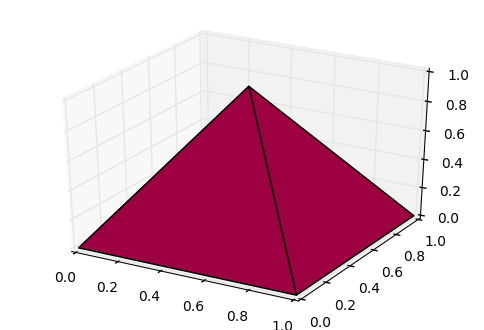

In [2]:
# https://stackoverflow.com/questions/26434726/return-surface-triangle-of-3d-scipy-spatial-delaunay
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay

# u, v are parameterisation variables
u = np.array([0,0,0.5,1,1]) 
v = np.array([0,1,0.5,0,1]) 

x = u
y = v
z = np.array([0,0,1,0,0])

# Triangulate parameter space to determine the triangles
#tri = mtri.Triangulation(u, v)
tri = Delaunay(np.array([u,v]).T)

print('polyhedron(faces = [')
#for vert in tri.triangles:
for vert in tri.simplices:
    print('[%d,%d,%d],' % (vert[0],vert[1],vert[2]))
print('], points = [')
for i in range(x.shape[0]):
    print('[%f,%f,%f],' % (x[i], y[i], z[i]))
print(']);')


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
#ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap=plt.cm.Spectral)


plt.show()